## Harris Corner Detection

Corners are region in the image with large variation in intensity in all the direction. Harris Corner Dectector was first  introdcuted by Chris HArris and mike Sthephes in 1988. It contains three main steps:

1. determine which window produces very large variation in intensity when move in X or Y direction. Windows are the area in change from box to x or y direction

2. with each such window found, a score R is computed. R will give us the idea about where this window is in the image.

3. Apply threshold to this score, important corners are selected and marked

From step 1 we get Eculidean distance of the shift in intensity cell to either x or y direction. We maximize this function, distance using TAYLOR EXPANSION and mathematical steps, we get approximate values M in [u v] vector. We take derivate of x and y, using SOBEL function in OpenCV

From step 2, Rscore = det (M) - k(trace(M))**2
where det(M) - lambda1, lambda2
trace(M) - lambda1 + lambda2
lambda1 and lambda2 are eigen values of M

From step 3 - After applying threshold to the R score, important corners are selected and marked.

if:
1. |R| is small which happens when lambda1 and lambda2 are small, the region is flat.
2. |R| < 0 whihc happens when lambda1 >> lambda2 or vice versa, the region is an edge.
3. |R| is large which happens when lambda1 and lambda2 are large and lambda1~lambda2, the region is a corner.



In [8]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [4]:
image = cv.imread('chessboard.jpg')

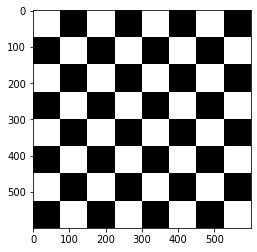

In [5]:
plt.imshow(image)

In [6]:
image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

In [9]:
#convert the grayscale image to float32 since Harris Corner takes image in float32 format. 

image_gray = np.float32(image_gray)

#### Apply Harris Corner
#values:(image(in float, block_size(window=2 meas (2x2), aperture_parameter for Sobel derivative, k(which Harris detector free parameter))

In [10]:
#apply Harris Corner we get destination image

dst = cv.cornerHarris(image_gray, 2, 3, 0.04)

In [11]:
#apply dilate to get better result, this marked through dialted corners.

dst = cv.dilate(dst, None)

In [14]:
#reverting back to original image with optimal threshold values, and mark all corners with color

image [dst > 0.01 * dst.max()] = [0, 255, 0]

In [17]:
#Display image

cv.imshow('final', image)
cv.waitKey(0)
cv.destroyAllWindows()
cv.waitKey(1)
cv.waitKey(1)
cv.waitKey(1)
cv.waitKey(1)

-1

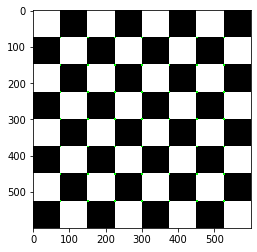

In [16]:
plt.imshow(image) #images with corners detected in green